# Pakistan's Telecom Churn Prediction 

## 🔍 Problem Definition  
The goal of this project is to predict customer churn based on various factors such as service satisfaction, network quality, and billing experience. Churn prediction is crucial for telecom companies to retain customers and improve their services. This is a **classification problem** where the target variable is **Churn** (Yes/No).  

## 📊 About the Dataset  
The dataset contains **9,760** entries and **19** columns. It includes categorical and numerical features related to customer experience, service usage, and network satisfaction.  

## 📌 Dataset Features  
Here are the key features in the dataset:  

- **Gender**: Customer's gender (Male/Female).  
- **Churn (Target Variable)**: Indicates whether a customer has churned (Yes/No).  
- **Network**: The telecom provider used by the customer.  
- **relation_durattion**: How long the customer has been using the service.  
- **service_type**: Whether the customer is using Prepaid or Postpaid.  
- **source_of_attraction**: How the customer was attracted to the service (Advertisement, Facebook, etc.).  
- **prferred_communication**: Preferred mode of communication (Messages, Audio Calling, etc.).  
- **satisfy_with_call_rate**: Whether the customer is satisfied with call rates (Yes/No).  
- **contact_with_cust_care**: Whether the customer contacted customer care (Yes/No).  
- **rate_of_cust_care_calling**: Frequency of customer care calls (Rarely, Often, etc.).  
- **reascon_of_contact_cc**: Reason for contacting customer care (Complaints, Information, etc.).  
- **monthly_usage_rs**: Monthly usage in Rupees (numeric feature).  
- **Happy_with_intrnet_quality**: Satisfaction with internet quality (Yes/No).  
- **4G_available**: Whether 4G service is available (Yes/No).  
- **satisfy_with_voice_quality**: Satisfaction with voice call quality (Yes/No).  
- **satisfy_with_signal_strength**: Satisfaction with network signal strength (Yes/No).  
- **pleaseed_with_prices**: Whether the customer is pleased with service pricing (Yes/No).  
- **satisfy_with_billing_process**: Satisfaction with the billing process (Yes/No).  
- **recommend_to_others**: Whether the customer would recommend the service (Yes/No).  

This dataset is well-structured for churn prediction, with both categorical and numerical features influencing customer retention. 🚀


## Importing the libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Load the Dataset 

In [3]:
df = pd.read_csv('churnData.csv')
df.head()

,Gender,Churn,Network,relation_durattion,service_type,source_of_attraction,prferred_communication,satisfy_with_call_rate,contact_with_cust_care,rate_of_cust_care_calling,reascon_of_contact_cc,monthly_usage_rs,Happy_with_intrnet_quality,4G_available,satisfy_with_voice_quality,satisfy_with_signal_strength,pleaseed_with_prices,satisfy_with_billing_process,recommend_to_others
0,Female,No,Jazz / Warid,More than one year,Pre Paid,Advertisement,messages,Yes,No,rarely,Complaints,800,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,Female,No,Jazz / Warid,More than one year,Pre Paid,Others,Audio calling,No,Yes,rarely,Complaints,500,No,Yes,Yes,Yes,No,No,No
2,Male,No,Jazz / Warid,More than one year,Pre Paid,Advertisement,Audio calling,No,Yes,rarely,Complaints,500,Yes,Yes,No,No,No,Yes,Yes
3,Female,No,Jazz / Warid,More than one year,Pre Paid,Advertisement,messages,Yes,No,rarely,Information regarding new schemes,300,Yes,Yes,Yes,Yes,Yes,No,Yes
4,Male,No,Jazz / Warid,More than one year,Pre Paid,Face book,Audio calling,Yes,Yes,rarely,Complaints,800,Yes,Yes,Yes,Yes,No,No,Yes


In [9]:
# Describe the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
monthly_usage_rs,9760.0,382.786885,259.802828,50.0,300.0,300.0,500.0,800.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9760 entries, 0 to 9759
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Gender                        9760 non-null   object
 1   Churn                         9760 non-null   object
 2   Network                       9760 non-null   object
 3   relation_durattion            9760 non-null   object
 4   service_type                  9760 non-null   object
 5   source_of_attraction          9760 non-null   object
 6   prferred_communication        9760 non-null   object
 7   satisfy_with_call_rate        9760 non-null   object
 8   contact_with_cust_care        9760 non-null   object
 9   rate_of_cust_care_calling     9760 non-null   object
 10  reascon_of_contact_cc         9760 non-null   object
 11  monthly_usage_rs              9760 non-null   int64 
 12  Happy_with_intrnet_quality    9760 non-null   object
 13  4G_available      

In [11]:
# Check for any missing values
df.isnull().sum()

Gender                          0
Churn                           0
Network                         0
relation_durattion              0
service_type                    0
source_of_attraction            0
prferred_communication          0
satisfy_with_call_rate          0
contact_with_cust_care          0
rate_of_cust_care_calling       0
reascon_of_contact_cc           0
monthly_usage_rs                0
Happy_with_intrnet_quality      0
4G_available                    0
satisfy_with_voice_quality      0
satisfy_with_signal_strength    0
pleaseed_with_prices            0
satisfy_with_billing_process    0
recommend_to_others             0
dtype: int64

## 📊📉📈 Exploratory Data Analysis (EDA)
Since the dataset does not contain any missing values, Perform EDA

#### Distribution of Target Feature `Churn`

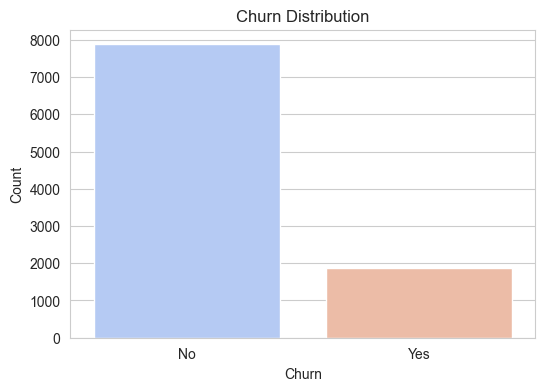

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Churn", palette="coolwarm")
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

#### Distribution of Monthly Usage (Rs)

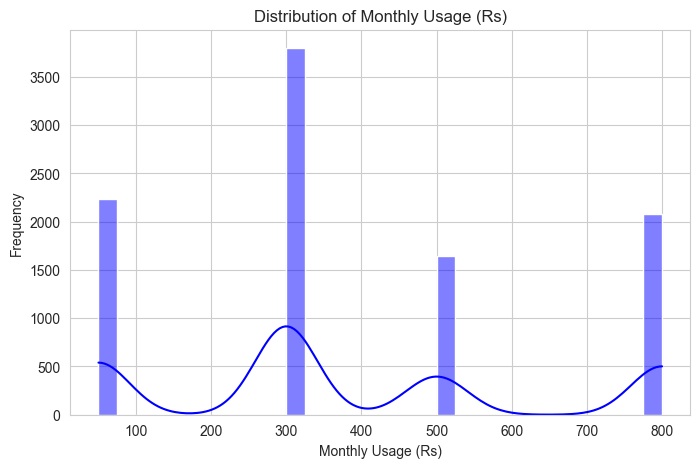

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(df["monthly_usage_rs"], bins=30, kde=True, color="blue")
plt.title("Distribution of Monthly Usage (Rs)")
plt.xlabel("Monthly Usage (Rs)")
plt.ylabel("Frequency")
plt.show()

#### Network Provider Distribution

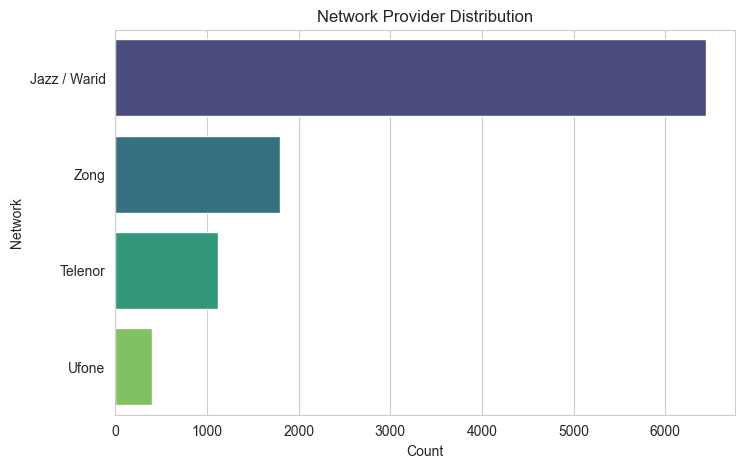

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y="Network", palette="viridis", order=df["Network"].value_counts().index)
plt.title("Network Provider Distribution")
plt.xlabel("Count")
plt.ylabel("Network")
plt.show()

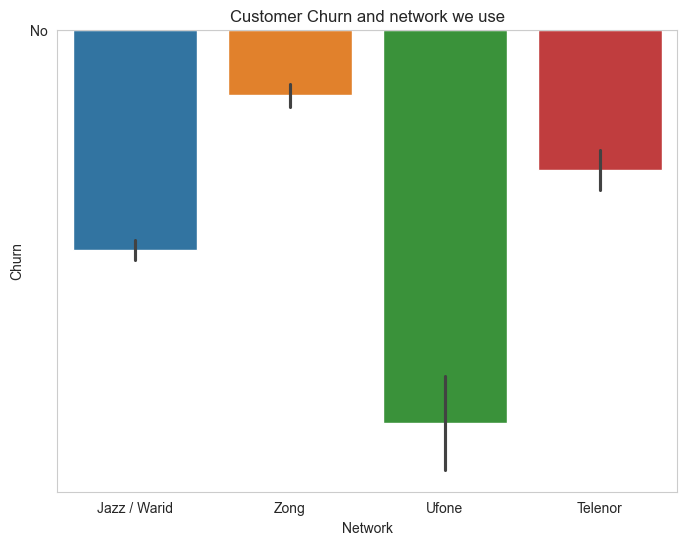

In [18]:
plt.figure(figsize=(8,6))
sns.barplot(x="Network", y="Churn", hue = "Network" ,data=df)
plt.title("Customer Churn and network we use")
plt.show()

## Data Preprocessing
Convert Categorical Features into Numerical Features

##### Identify which features are Categorical

In [20]:
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()
categorical_features

['Gender',
 'Churn',
 'Network',
 'relation_durattion',
 'service_type',
 'source_of_attraction',
 'prferred_communication',
 'satisfy_with_call_rate',
 'contact_with_cust_care',
 'rate_of_cust_care_calling',
 'reascon_of_contact_cc',
 'Happy_with_intrnet_quality',
 '4G_available',
 'satisfy_with_voice_quality',
 'satisfy_with_signal_strength',
 'pleaseed_with_prices',
 'satisfy_with_billing_process',
 'recommend_to_others']

#### Convert Categorical Features into Numerical Features

In [21]:
# Copy dataset for preprocessing
df_processed = df.copy()

# Encoding categorical variables
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le

#### Identify which Feature(s) are Numerical Feature(s)

In [23]:
numerical_features = df.select_dtypes(exclude=["object"]).columns.tolist()
numerical_features

['monthly_usage_rs']

#### Standardize the numerical feature `monthly_usage_rs`

In [29]:
# Scaling the numerical column
scaler = StandardScaler()
df_processed["monthly_usage_rs"] = scaler.fit_transform(df_processed[["monthly_usage_rs"]])
df_processed.head(10) 

,Gender,Churn,Network,relation_durattion,service_type,source_of_attraction,prferred_communication,satisfy_with_call_rate,contact_with_cust_care,rate_of_cust_care_calling,reascon_of_contact_cc,monthly_usage_rs,Happy_with_intrnet_quality,4G_available,satisfy_with_voice_quality,satisfy_with_signal_strength,pleaseed_with_prices,satisfy_with_billing_process,recommend_to_others
0,0,0,0,3,1,0,2,1,0,3,0,1.605966,1,1,1,1,1,1,1
1,0,0,0,3,1,3,0,0,1,3,0,0.451185,0,1,1,1,0,0,0
2,1,0,0,3,1,0,0,0,1,3,0,0.451185,1,1,0,0,0,1,1
3,0,0,0,3,1,0,2,1,0,3,1,-0.318669,1,1,1,1,1,0,1
4,1,0,0,3,1,1,0,1,1,3,0,1.605966,1,1,1,1,0,0,1
5,0,0,0,3,1,3,2,1,0,3,1,-1.280987,1,1,1,0,1,1,0
6,1,0,0,1,1,3,0,0,1,2,0,1.605966,0,0,0,0,1,0,0
7,1,0,0,3,1,3,0,1,1,3,2,-0.318669,1,1,1,1,1,1,1
8,1,0,0,3,1,0,0,0,0,3,2,-1.280987,1,1,1,0,0,1,0
9,0,0,3,3,0,0,0,0,0,3,0,-1.280987,1,1,1,0,1,0,1


### Visualizing the correlation heatmap after preprocessing

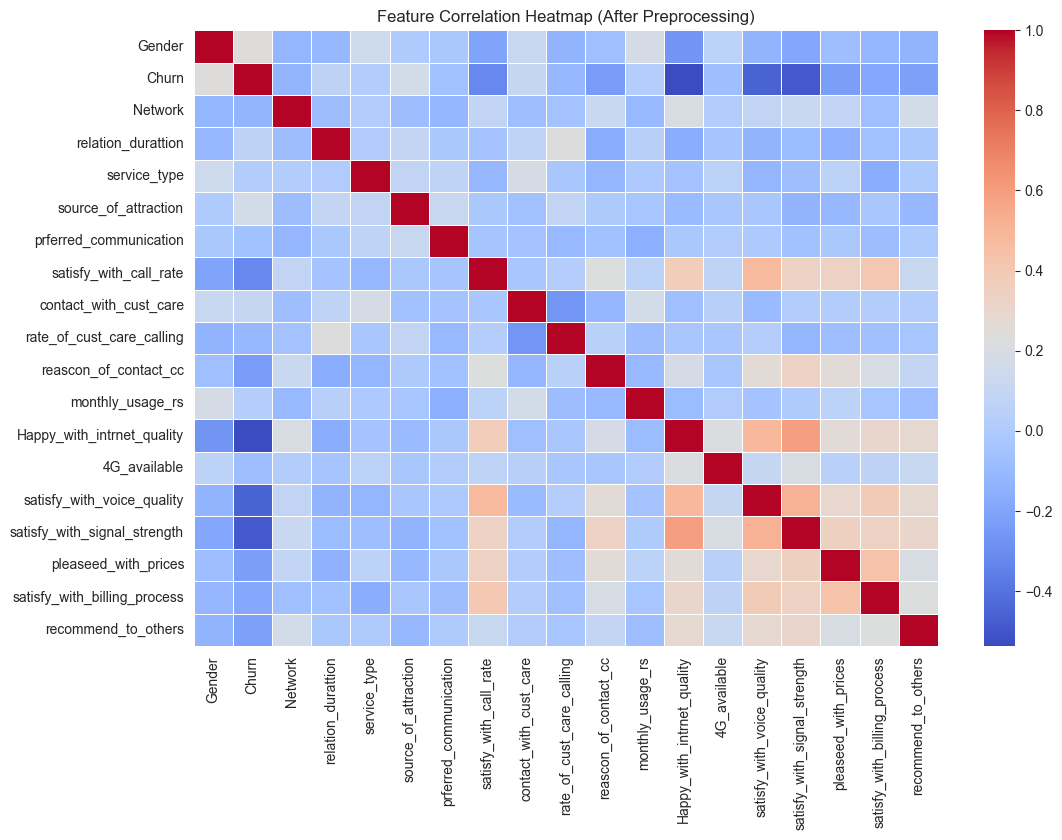

In [31]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_processed.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap (After Preprocessing)")
plt.show()

### Dataset Splitting

In [25]:
# Splitting dataset into train and test sets
X = df_processed.drop(columns=["Churn"])  # Features
y = df_processed["Churn"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 🤖📚🔮 Model Training
Using the following models:
- `Logistic Regression`
- `Support Vector Machine`
- `K-Nearest Neighbors`

In [36]:
# Define the Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine (SVM)": SVC(kernel="linear", random_state=42),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=5)
}


#### Train and Evaluate each model

In [37]:
# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Training
    y_pred = model.predict(X_test)  # Prediction
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
results_df


,Accuracy,Precision,Recall,F1-score
Logistic Regression,0.877561,0.699708,0.638298,0.667594
Support Vector Machine (SVM),0.878074,0.692737,0.659574,0.675749
K-Nearest Neighbors (KNN),1.000000,1.000000,1.000000,1.000000
